# 1. Flight Price

# Question 1: Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?/

## Ans
------

In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Load the wine quality dataset
df = pd.read_excel('flight_price.xlsx')
rows,cols = df.shape
print(f"total rows",rows)
print(f"total cols",cols)

total rows 10683
total cols 11


In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Question 2 : What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

## Ans
-----------

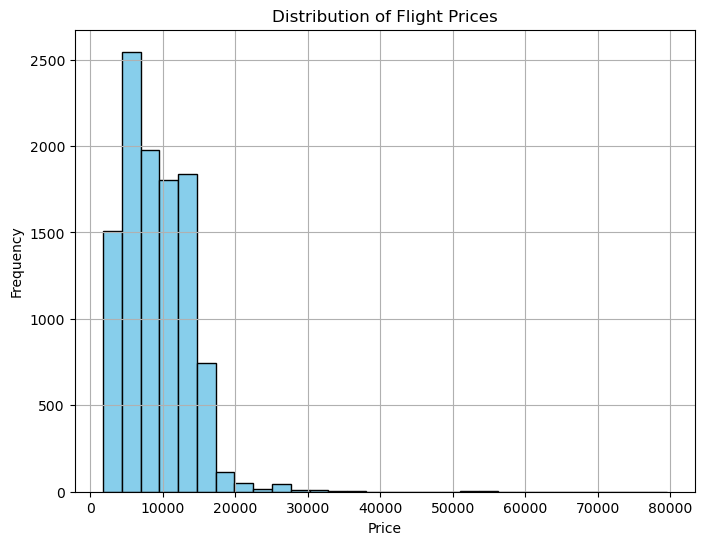

In [3]:
flight_data = df
# Plotting a histogram for flight prices
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')  # Adjust 'bins' for granularity
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Histogram shows that Price is Right (Positively) Skewed so transformations can be applied to make the data more normally distributed.

In [4]:
# Log transformation on 'price' column
flight_data['log_price'] = flight_data['Price'].apply(lambda x: np.log(x) if x > 0 else 0)  # Apply log transformation

# Display the first few rows to observe the transformed data
print(flight_data[['Price', 'log_price']].head())

   Price  log_price
0   3897   8.267962
1   7662   8.944028
2  13882   9.538348
3   6218   8.735204
4  13302   9.495670


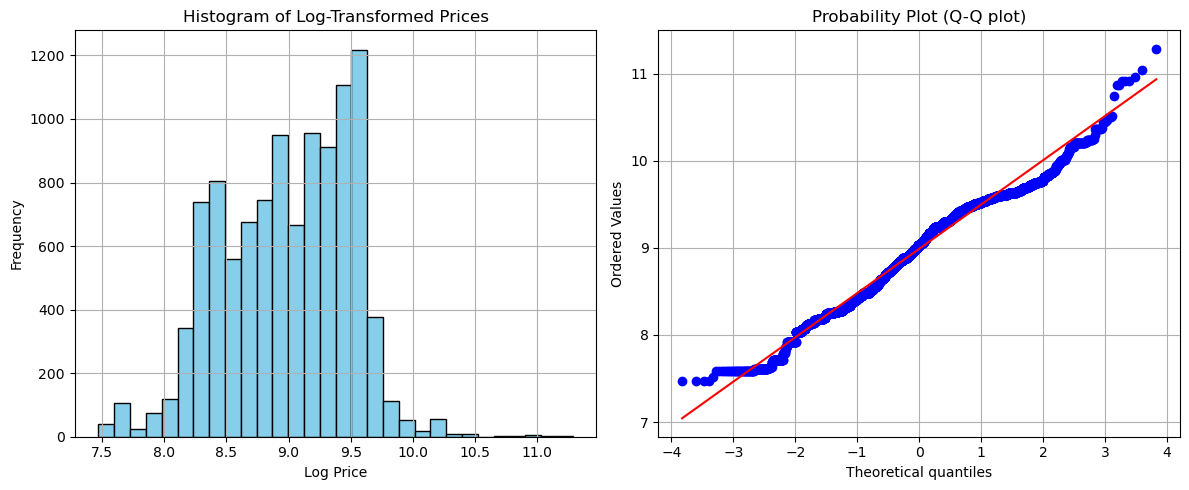

In [5]:
# Create subplots for histogram and probability plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot a histogram of log-transformed flight prices
ax[0].hist(flight_data['log_price'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Log-Transformed Prices')
ax[0].set_xlabel('Log Price')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

# Create Q-Q plot for log-transformed flight prices
stats.probplot(flight_data['log_price'], dist="norm", plot=ax[1])
ax[1].set_title('Probability Plot (Q-Q plot)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Question 3 : What is the range of prices in the dataset? What is the minimum and maximum price?

## Ans
--------

In [6]:
df.describe()

,Price,log_price
count,10683.000000,10683.000000
mean,9087.064121,8.989145
std,4611.359167,0.513610
min,1759.000000,7.472501
25%,5277.000000,8.571113
50%,8372.000000,9.032648
75%,12373.000000,9.423272
max,79512.000000,11.283663


In [7]:
# Calculate range, minimum, and maximum prices
price_min = flight_data['Price'].min()  # Minimum price
price_max = flight_data['Price'].max()  # Maximum price
price_range = price_max - price_min
print(price_range)

77753


# Question 4 : How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines ?

# Ans
-----

In [8]:
flight_data.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                           log_price                       \
                                       max     count       mean       std   
Airline                                                                     
Air Asia                           13774.0     319.0   8.574405  0.318106   
Air India                          31945.0    1752.0   9.081856  0.440882   
GoAir                              22794.0     194.0   8.601100  0.365480   
IndiGo                             22153.0    2053.0   8.579689  0.346828   
Jet Airways                        54826.0    3849.0   9.293121  0.390258   
Jet Airways Business               79512.0       6.0  10.959122  0.187243   
Multiple carriers                  36983.0    1196.0   9.244338  0.319516   
Multiple carriers Premium economy  14629.0      13.0   9.333337  0.142187   
SpiceJet                           23267.0     818.0   8.303975  0.368382   
Trujet                              4140.0       1.0   8.328451       NaN   
Vistara                            21730.0     479.0   8.895532  0.362347   
Vistara Premium economy            11793.0       3.0   9.062790  0.343898   

                                                                               \
                                         min        25%        50%        75%   
Airline                                                                         
Air Asia                            8.126518   8.362175   8.549079   8.771990   
Air India                           7.625595   8.838696   9.153029   9.410747   
GoAir                               8.130942   8.268219   8.543835   8.826302   
IndiGo                              7.708411   8.349011   8.517193   8.778634   
Jet Airways                         7.517521   9.119759   9.347229   9.557541   
Jet Airways Business     

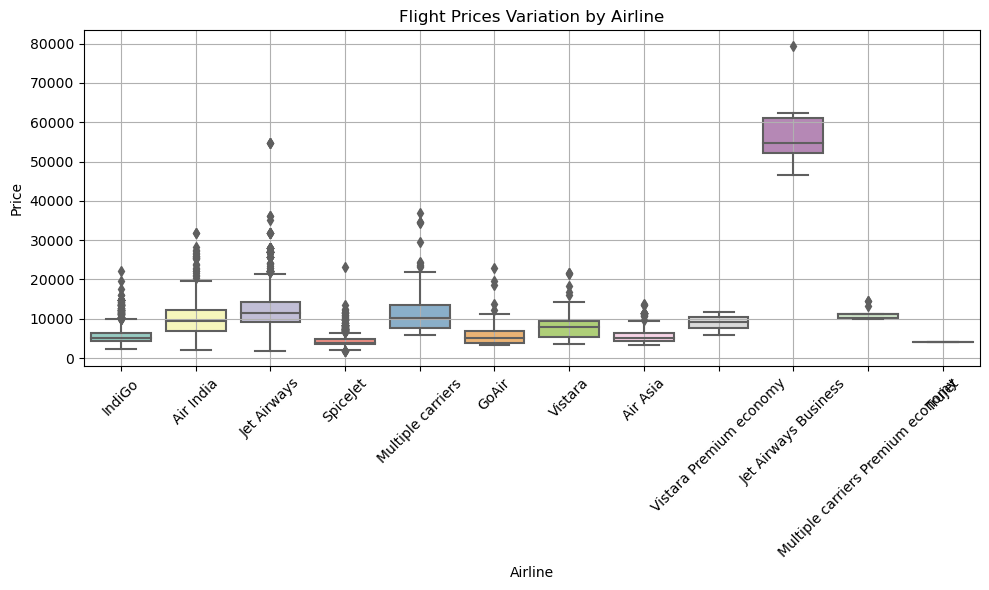

In [9]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=flight_data, palette='Set3')
plt.title('Flight Prices Variation by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate airline names for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 5 : Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis?

## Ans
-------

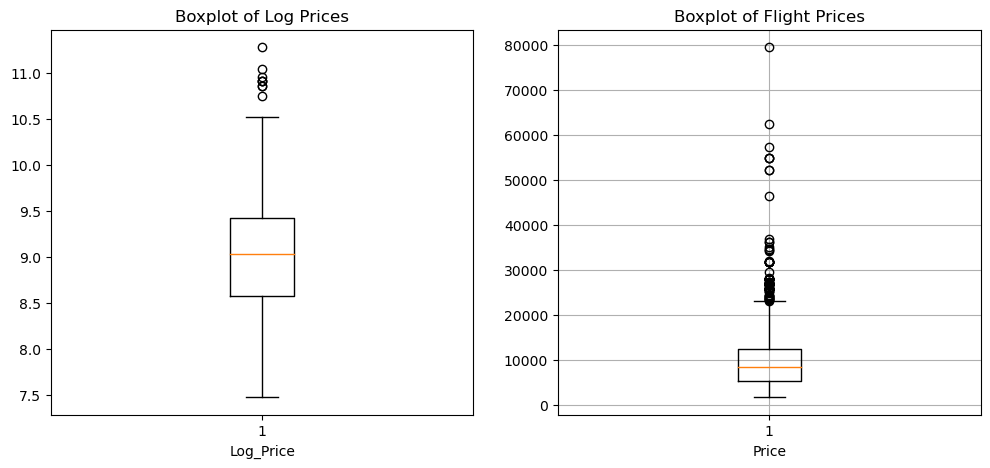

In [10]:
# Create subplots for histogram and probability plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot of Log Prices
ax[0].boxplot(flight_data['log_price'])
ax[0].set_title('Boxplot of Log Prices')
ax[0].set_xlabel('Log_Price')

# Boxplot of Flight Prices
ax[1].boxplot(flight_data['Price'])
ax[1].set_title('Boxplot of Flight Prices')
ax[1].set_xlabel('Price')

plt.grid(True)
plt.show()

### The outliers are valid and reflect real-world scenarios (e.g., premium tickets for luxury airlines), retaining these extreme values might be useful. They can represent critical information about price ranges for specific airlines.

### If outliers disproportionately impact the analysis or model performance, consider using data transformations to reduce their influence. Log transformation or winsorization can mitigate the effect of extreme values on model training.

In [11]:
# Calculate the Interquartile Range (IQR) for 'price' column
Q1 = flight_data['Price'].quantile(0.25)
Q3 = flight_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = flight_data[(flight_data['Price'] < lower_bound) | (flight_data['Price'] > upper_bound)]

# Count total outliers
total_outliers = len(outliers)

print(f"Total Outliers: {total_outliers}")
print("\nOutlier Dataset:")


Total Outliers: 94

Outlier Dataset:


In [12]:
outliers.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,log_price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430,10.219393
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983,10.518214
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,10.199510
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890,10.199510
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139,10.132176


# Question 6 : You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

# Ans
-----

In [13]:
flight_data.head(1)
flight_data['date'] = pd.to_datetime(flight_data['Date_of_Journey'])
flight_data['month'] = flight_data['date'].dt.month
flight_data['year'] = flight_data['date'].dt.year
flight_data['Day'] = flight_data['date'].dt.day_name()

/tmp/ipykernel_367/1628361704.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data['date'] = pd.to_datetime(flight_data['Date_of_Journey'])


In [14]:
flight_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,log_price,date,month,year,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,8.267962,2019-03-24,3,2019,Sunday


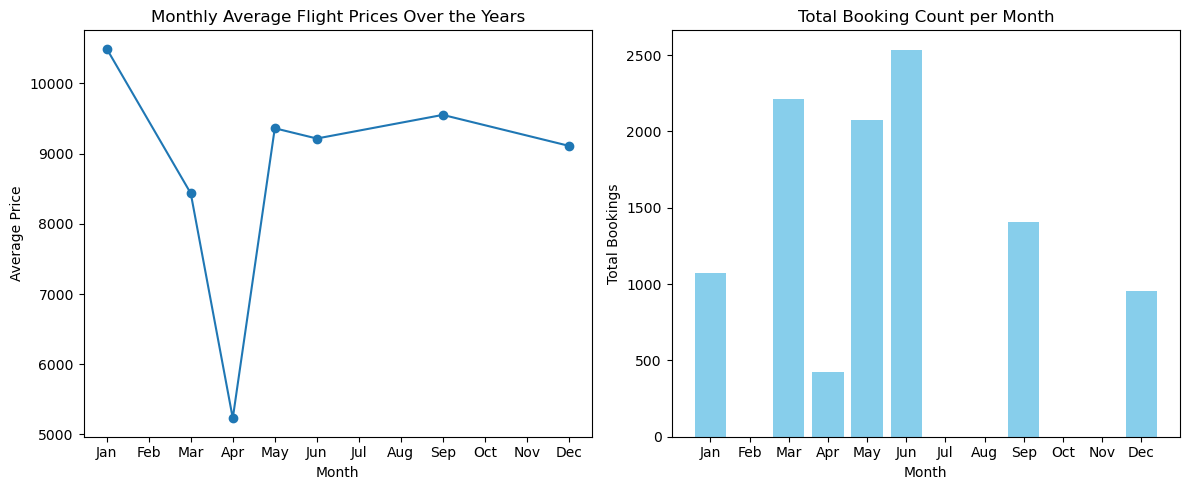

In [15]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

monthly_booking_count = flight_data['month'].value_counts().sort_index()
monthly_avg_prices = flight_data.groupby('month')['Price'].mean().reset_index()

# Line plot for Monthly Average Flight Prices Over the Years
ax1.plot(monthly_avg_prices['month'], monthly_avg_prices['Price'], marker='o')
ax1.set_title('Monthly Average Flight Prices Over the Years')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Total Booking Count per Month in a Histogram
ax2.bar(monthly_booking_count.index, monthly_booking_count.values, color='skyblue')
ax2.set_title('Total Booking Count per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Bookings')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

In [16]:
flight_data.groupby(by='year').mean(numeric_only=True)['Price'].sort_values()

year
2019    9087.064121
Name: Price, dtype: float64

In [17]:
flight_data.groupby(by='month').mean(numeric_only=True)['Price'].sort_values()

month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

In [18]:
flight_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [19]:
flight_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,log_price,date,month,year,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,8.267962,2019-03-24,3,2019,Sunday


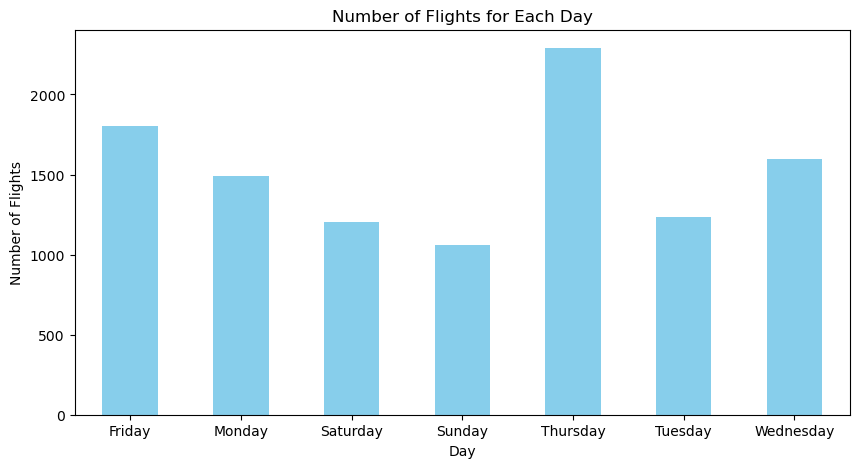

In [20]:
# Plotting number of flights for each day
plt.figure(figsize=(10, 5))
flight_data['Day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Flights for Each Day')
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.show()

In [21]:
flight_data.groupby(by='Day').mean(numeric_only=True)['Price'].sort_values()

Day
Wednesday    7996.290807
Friday       8556.502220
Saturday     8894.375727
Tuesday      8960.452265
Sunday       9556.827684
Monday       9721.101945
Thursday     9805.088646
Name: Price, dtype: float64

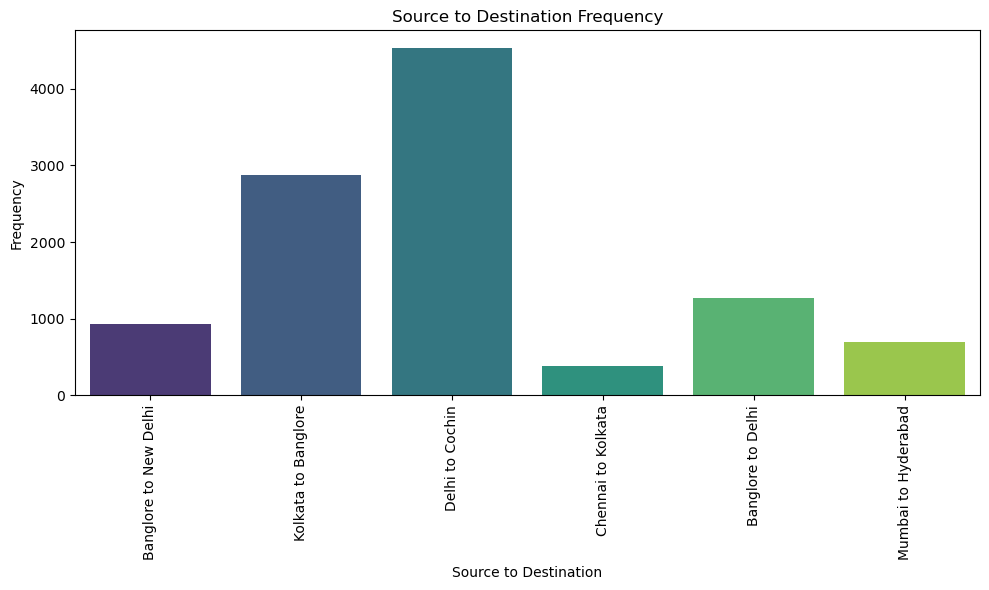

In [22]:
# Combine 'Source' and 'Destination' to show relationships
flight_data['Source_Destination'] = flight_data['Source'] + ' to ' + flight_data['Destination']

# Plot the relationship between Source and Destination
plt.figure(figsize=(10, 6))
sns.countplot(data=flight_data, x='Source_Destination', palette='viridis')
plt.title('Source to Destination Frequency')
plt.xlabel('Source to Destination')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [23]:
flight_data.groupby(by='Source_Destination').mean(numeric_only=True)['Price'].sort_values()

Source_Destination
Chennai to Kolkata        4789.892388
Mumbai to Hyderabad       5059.708752
Banglore to Delhi         5143.918577
Kolkata to Banglore       9158.389411
Delhi to Cochin          10539.439057
Banglore to New Delhi    11917.716738
Name: Price, dtype: float64

# Question 7 : You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

## Ans
------



**Features to Analyze:**

1. **Date/Time:** Analyze flight prices over time to identify seasonal or periodic trends. Consider analyzing trends based on the day of the week, month, or even hour of the day.
  
2. **Source and Destination:** Explore how flight prices vary based on the source and destination. Some routes might be more expensive due to demand or seasonality.

3. **Airlines:** Investigate if flight prices vary significantly among different airlines.

**Visualizations to Present Findings:**

1. **Time Series Plots:** Use line plots to display flight prices over time. Plot the average price for each day or month to visualize trends.

2. **Box Plots or Violin Plots:** Display the distribution of flight prices for different sources and destinations. This helps to understand the range and distribution of prices.

3. **Bar Charts:** Show average flight prices by day of the week, month, or airline. This allows for easy comparison of prices across different categories.

4. **Heatmaps:** Utilize a heatmap to visualize flight prices across different months and days of the week. It helps in identifying patterns in prices.

5. **Scatter Plots:** Investigate if there's any correlation between flight prices and other numerical factors like distance or duration. 

In [24]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,log_price,date,month,year,Day,Source_Destination
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,8.267962,2019-03-24,3,2019,Sunday,Banglore to New Delhi


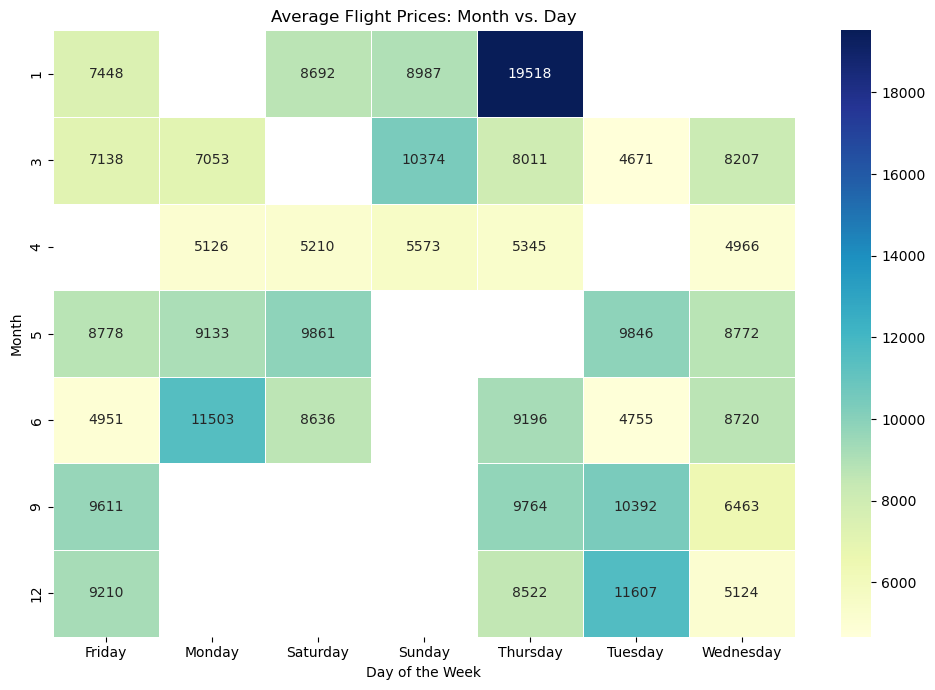

In [25]:
flight_price_pivot = flight_data.pivot_table(values='Price', index='month', columns='Day', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(flight_price_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Flight Prices: Month vs. Day')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

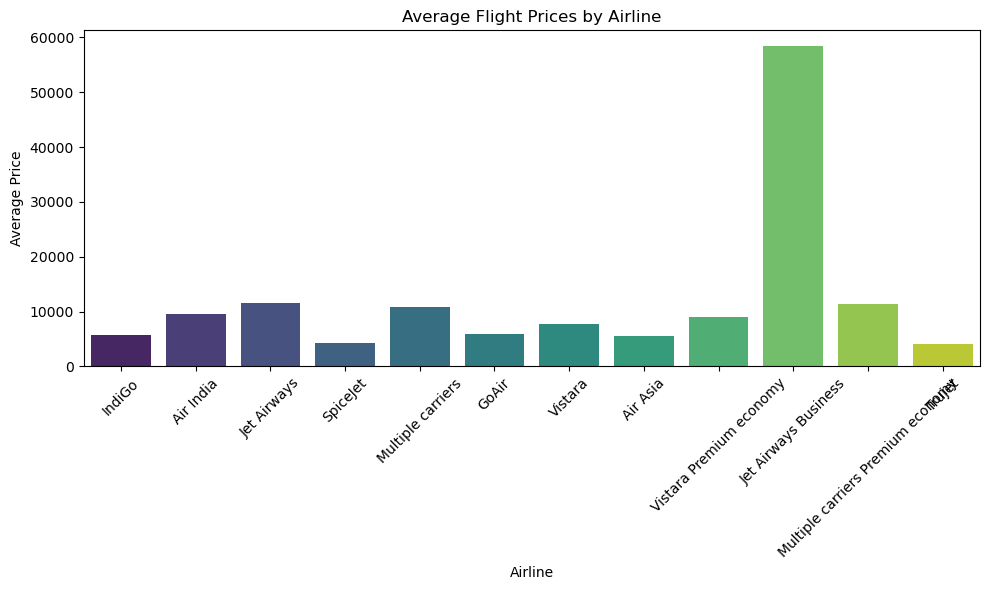

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=flight_data, x='Airline', y='Price', errorbar=None, palette='viridis')
plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

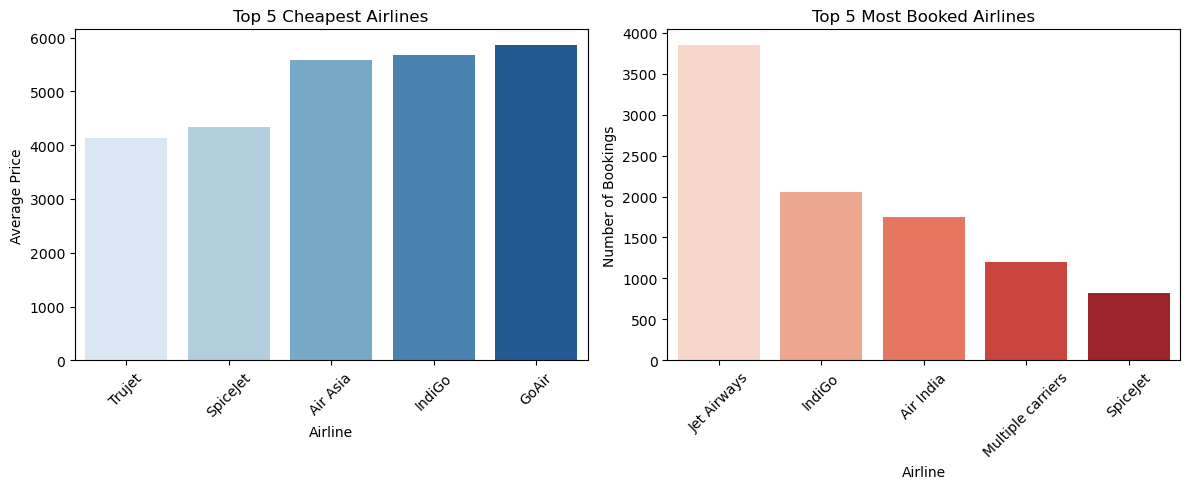

In [27]:
# Top 5 Cheapest Airlines (Average Prices)
cheapest_airlines = flight_data.groupby('Airline')['Price'].mean().sort_values().head(5)  

# Top 5 Most Booked Airlines
most_booked_airlines = flight_data['Airline'].value_counts().head(5)  # Get the top 5 most booked airlines
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cheapest Airlines Plot
sns.barplot(x=cheapest_airlines.index, y=cheapest_airlines.values, ax=axes[0], palette='Blues')
axes[0].set_title('Top 5 Cheapest Airlines')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=45)

# Most Booked Airlines Plot
sns.barplot(x=most_booked_airlines.index, y=most_booked_airlines.values, ax=axes[1], palette='Reds')
axes[1].set_title('Top 5 Most Booked Airlines')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Number of Bookings')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 8 : You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

## Ans
________

### Features to Analyze:

1. **Airline:** Different airlines might have varying price ranges.
2. **Source and Destination:** Prices can differ based on the source and destination cities.
3. **Total Stops:** More layovers might generally increase the price.
4. **Date, Month, Year, Day:** Prices might fluctuate based on specific dates, months, years, or days of the week.
5. **Duration:** Longer flight durations could affect the ticket prices.
6. **Additional Information:** Special services or features might influence the price.
7. **Route:** The flight path might impact prices.

### Analysis and Presentation:

1. **Correlation Analysis:** Analyze the correlation between different features and flight prices. Utilize techniques like Pearson's correlation coefficient to identify linear relationships.

2. **Statistical Tests:** Conduct statistical tests to understand the significance of features concerning flight prices. ANOVA or t-tests can be helpful in comparing means among different categories.

3. **Visualization:** Use visualizations to observe patterns and relationships. Box plots, scatter plots, and bar plots can illustrate how different features impact flight prices.

4. **Feature Importance:** If you plan to build a predictive model, use techniques like feature importance from machine learning models to understand which features contribute the most to predicting flight prices.

5. **Time Series Analysis:** Analyze how flight prices change over time. Check for seasonal variations, trends, or any recurring patterns in prices over different months or days.

6. **Outlier Analysis:** Identify and understand the impact of outliers on flight prices. Decide whether to remove, transform, or adjust them.

7. **Regression Analysis:** If applicable, perform regression analysis to understand the relationship between multiple features and flight prices. Ordinary Least Squares (OLS) or regression models can help.


# Data Cleaning and Feature Engineering - Done

In [28]:
airline_data = pd.read_csv('airlines_cleaned.csv')
flight_data =  pd.read_csv('flight_cleaned.csv')

In [30]:
# Concatenating airline and flight 
df_flight = pd.concat([flight_data,airline_data],axis=1)
# df_flight = df_flight.drop("Unnamed: 0",axis=1,inplace=True)
df_flight =  df_flight.drop(labels=['Unnamed: 0'],axis=1)

In [31]:
df_flight.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Dur_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Seperating X independent features and Y depjendent
X = df_flight.drop(labels=['Price'],axis=1)
Y = df_flight[['Price']]

In [34]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

In [35]:
X_train.shape,X_test.shape

((8546, 33), (2137, 33))

## Feature Selection based on correlaltion

In [36]:
X_train.corr()

,Total_Stops,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Dur_hour,Dur_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.022251,0.061223,NaN,0.033885,-0.106233,-0.060564,-0.003520,0.737729,-0.135267,...,-0.238366,0.485035,0.042399,-0.256747,0.042399,0.485035,-0.447325,-0.256747,-0.238366,-0.019575
Date,-0.022251,1.000000,-0.044509,NaN,-0.006161,-0.015956,0.002156,-0.002955,-0.031076,-0.002626,...,0.012247,0.093239,-0.067207,-0.011755,-0.067207,0.093239,0.015370,-0.011755,0.012247,-0.072874
Month,0.061223,-0.044509,1.000000,NaN,-0.004440,-0.104539,0.038270,-0.065180,0.026557,-0.046121,...,0.005188,0.141394,0.093752,-0.045321,0.093752,0.141394,0.087618,-0.045321,0.005188,-0.458037
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_hours,0.033885,-0.006161,-0.004440,NaN,1.000000,-0.153811,0.010202,0.048025,0.055990,-0.116613,...,-0.015428,-0.018240,0.058407,-0.036203,0.058407,-0.018240,-0.022043,-0.036203,-0.015428,0.007235
Arrival_min,-0.106233,-0.015956,-0.104539,NaN,-0.153811,1.000000,0.067371,-0.021211,-0.077786,0.149576,...,-0.032904,-0.214867,0.122080,0.079925,0.122080,-0.214867,0.098016,0.079925,-0.032904,0.023938
Dept_hour,-0.060564,0.002156,0.038270,NaN,0.010202,0.067371,1.000000,-0.024725,0.010579,-0.028640,...,-0.012077,-0.117861,0.154563,-0.012709,0.154563,-0.117861,0.010760,-0.012709,-0.012077,-0.029828
Dept_min,-0.003520,-0.002955,-0.065180,NaN,0.048025,-0.021211,-0.024725,1.000000,-0.023035,0.087417,...,0.070612,-0.087564,-0.030466,0.039255,-0.030466,-0.087564,0.006253,0.039255,0.070612,0.112301
Dur_hour,0.737729,-0.031076,0.026557,NaN,0.055990,-0.077786,0.010579,-0.023035,1.000000,-0.119156,...,-0.190456,0.292954,0.135669,-0.233027,0.135669,0.292954,-0.347758,-0.233027,-0.190456,0.003084
Dur_min,-0.135267,-0.002626,-0.046121,NaN,-0.116613,0.149576,-0.028640,0.087417,-0.119156,1.000000,...,-0.101709,-0.157513,0.018284,-0.021367,0.018284,-0.157513,0.218022,-0.021367,-0.101709,0.083331


In [37]:
def correlation(dataset, threshold):
    col_corr = set() # koi value firse repate na ho
    corr_matrix = dataset.corr() #dataset ka correlation 
    for i in range(len(corr_matrix.columns)): # mein columns mein gya
        for j in range(i): #har column ki row mein jakr use compare krunga
            if abs(corr_matrix.iloc[i, j]) > threshold:  #compare kr row vs colum
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
# threshold--Domain expertise
corr_features=correlation(X_train,0.9)

In [39]:
corr_features

{'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata'}

In [40]:
# drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((8546, 29), (2137, 29))

In [41]:
## drop features when correlation is more than 0.85 
X_train.drop("Year",axis=1,inplace=True)
X_test.drop("Year",axis=1,inplace=True)
X_train.shape,X_test.shape

((8546, 28), (2137, 28))

## Feature Scaling Or Standardization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

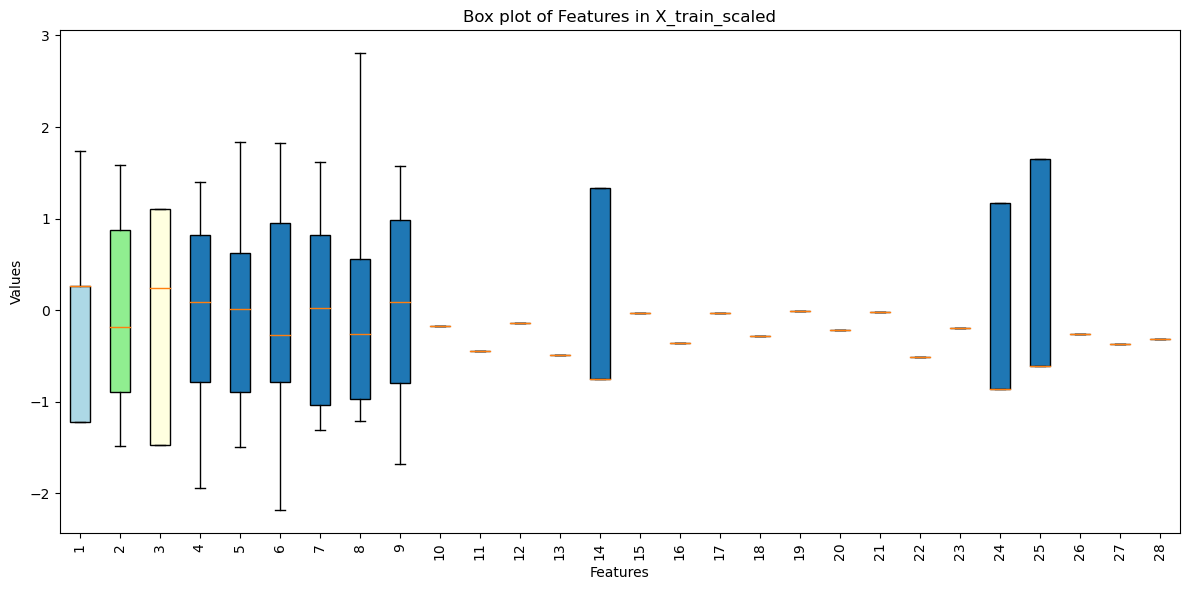

In [43]:
plt.figure(figsize=(12, 6))
box = plt.boxplot(X_train_scaled, patch_artist=True, showfliers=False)
colors = ['lightblue', 'lightgreen', 'lightyellow']  # Customize colors as needed

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, X_train_scaled.shape[1] + 1), range(1, X_train_scaled.shape[1] + 1), rotation=90) 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box plot of Features in X_train_scaled')
plt.tight_layout()
plt.show()

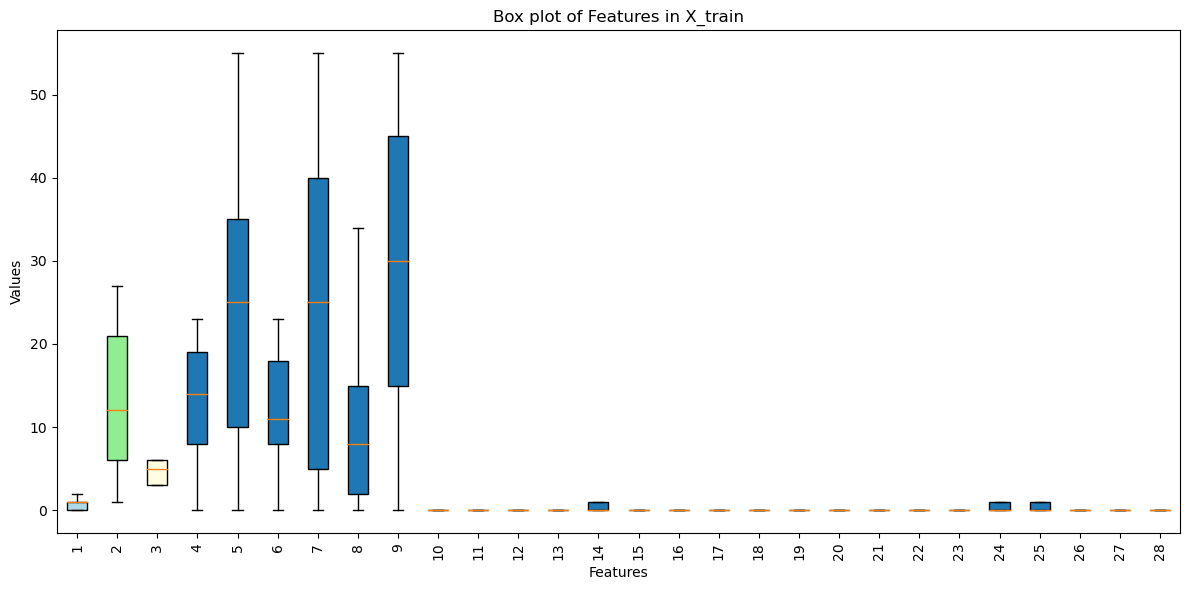

In [44]:
plt.figure(figsize=(12, 6))
box = plt.boxplot(X_train, patch_artist=True, showfliers=False)
colors = ['lightblue', 'lightgreen', 'lightyellow']  # Customize colors as needed

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, X_train.shape[1] + 1), range(1, X_train.shape[1] + 1), rotation=90)  # X-axis labels for each feature
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box plot of Features in X_train')
plt.tight_layout()
plt.show()

In [45]:
y_train_log = y_train['Price'].apply(lambda x: np.log(x) if x > 0 else 0)
y_test_log = y_test['Price'].apply(lambda x: np.log(x) if x > 0 else 0)

In [46]:
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate correlation matrix
correlation_matrix = train_data.corr()

# Get correlations with the target variable
correlations = correlation_matrix['Price'].sort_values(ascending=False)

In [47]:
correlations

Price                                        1.000000
Total_Stops                                  0.602284
Dur_hour                                     0.503801
Airline_Jet Airways                          0.409022
Airline_Jet Airways Business                 0.283634
Source_Delhi                                 0.265494
Destination_New Delhi                        0.182611
Airline_Multiple carriers                    0.139970
Airline_Air India                            0.051004
Arrival_hours                                0.028641
Source_Kolkata                               0.017823
Airline_Multiple carriers Premium economy    0.015239
Dept_hour                                    0.009354
Airline_Vistara Premium economy             -0.000453
Airline_Trujet                              -0.011588
Dept_min                                    -0.029540
Airline_Vistara                             -0.059328
Arrival_min                                 -0.085991
Month                       

In [48]:
# Assuming y_train is your target variable
y_train = np.ravel(y_train)

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming X_train, y_train are your feature and target datasets
k_best_features = SelectKBest(score_func=f_regression, k=10)
k_best_features.fit(X_train,y_train)

# Get the selected features
selected_features = X_train.columns[k_best_features.get_support()]

In [50]:
selected_features

Index(['Total_Stops', 'Dur_hour', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_SpiceJet', 'Source_Delhi',
       'Source_Mumbai', 'Destination_Delhi', 'Destination_New Delhi'],
      dtype='object')

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Fit a RandomForestRegressor model to your data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = importances.sort_values(ascending=False)

In [52]:
sorted_importances

Dur_hour                                     0.431138
Date                                         0.139348
Airline_Jet Airways Business                 0.081561
Airline_Jet Airways                          0.060585
Month                                        0.052632
Arrival_hours                                0.032034
Total_Stops                                  0.030465
Dept_hour                                    0.027583
Dept_min                                     0.024221
Dur_min                                      0.019123
Airline_Multiple carriers                    0.018583
Arrival_min                                  0.018114
Destination_New Delhi                        0.016209
Airline_IndiGo                               0.010010
Source_Banglore                              0.008349
Source_Mumbai                                0.007380
Airline_Air India                            0.004457
Source_Kolkata                               0.004234
Source_Delhi                

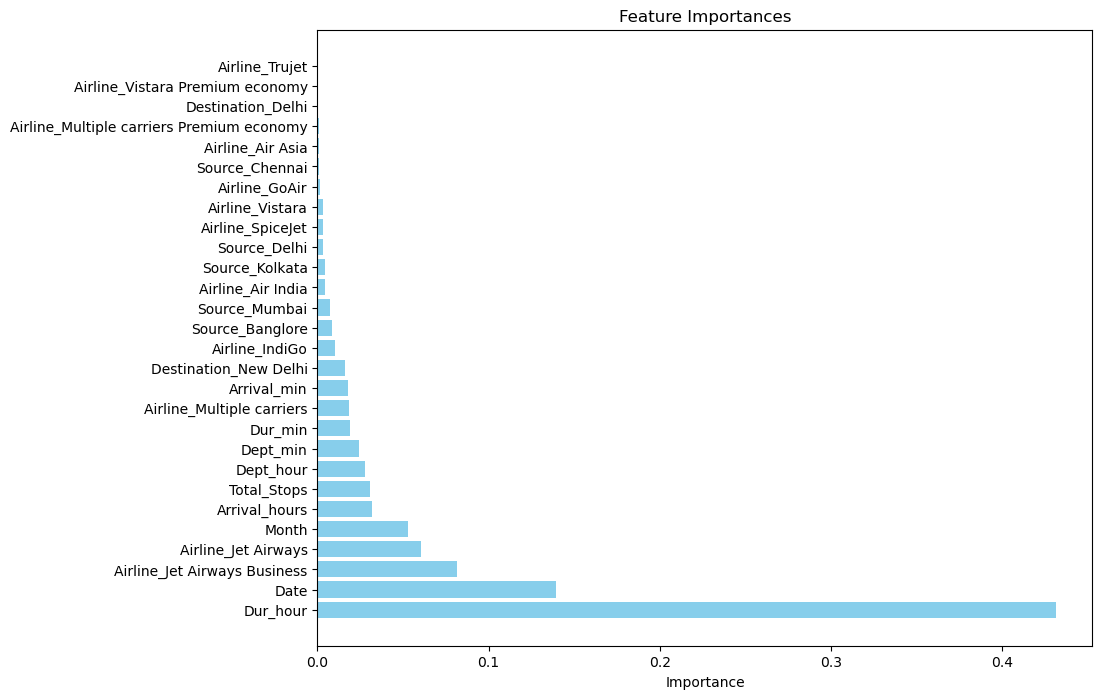

In [53]:
feature_importance = rf.feature_importances_

# Create a DataFrame to combine feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1993.0597020805315
R2 Score 0.5984438645709003


# RandomForestRegressor

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you've fitted the model and made predictions
predictions = rf.predict(X_test) 

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display the calculated metrics
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Root Mean Squared Error: 1986.4394721917445
Mean Absolute Error: 1165.7285534528385
R2 Score: 0.81609723116873


### Randomforest better than Linear becoz accuracy of random is greater than linear 0.81>0.59.

# 2. Google Playstore Dataset

## I'm having trouble saving the file in JupyterNotebook 
# because it's too large. The solutions for Questions 9 to 17 are provided in the next file.
**click this link**  https://github.com/Shansince2k3/pwassignment/blob/4805304ead10ab1d85e8dcf92c415142d700d062/Statistics%2006-%2031%20Mar/25%20Mar%20part%202%20final.ipynb